<a href="https://colab.research.google.com/github/AmanSinghal07/PraxisProjects/blob/main/Flight_Fare_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files


uploaded = files.upload()

Saving Flight Fare data.xlsx to Flight Fare data.xlsx


In [4]:
import io

df = pd.read_excel(io.BytesIO(uploaded['Flight Fare data.xlsx']))
print(df)

           Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun

In [5]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [7]:
df.shape

(10683, 11)

In [8]:
# checking for null values in our dataframe.
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [13]:
df1=df.dropna()

In [14]:
df1.shape

(10682, 11)

In [15]:
df1.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10682,10682,10682,10682,10682,10682,10682,10682,10682,10682,10682.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4536,4536,2376,233,423,550,5625,8344,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.214567
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.548810
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


### **EDA **

Airlines vs Price

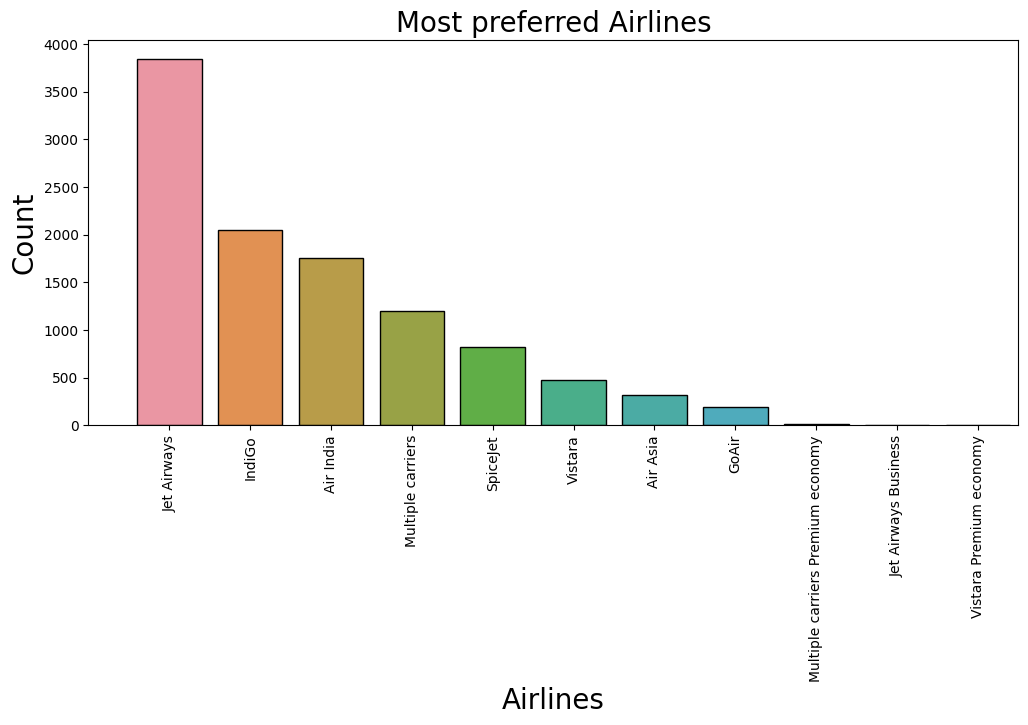

In [20]:
plt.figure(figsize=(12,5))
sns.countplot(x="Airline", data=df1,order = df1['Airline'].value_counts().index,ec = "black")
font_style={'family':'times new roman','size':20,'color':'black'}
plt.title("Most preferred Airlines",fontdict=font_style)
plt.ylabel("Count",fontdict=font_style)
plt.xlabel("Airlines",fontdict=font_style)
plt.xticks(rotation= 90)
plt.xlim(-1,10.5)
plt.show()

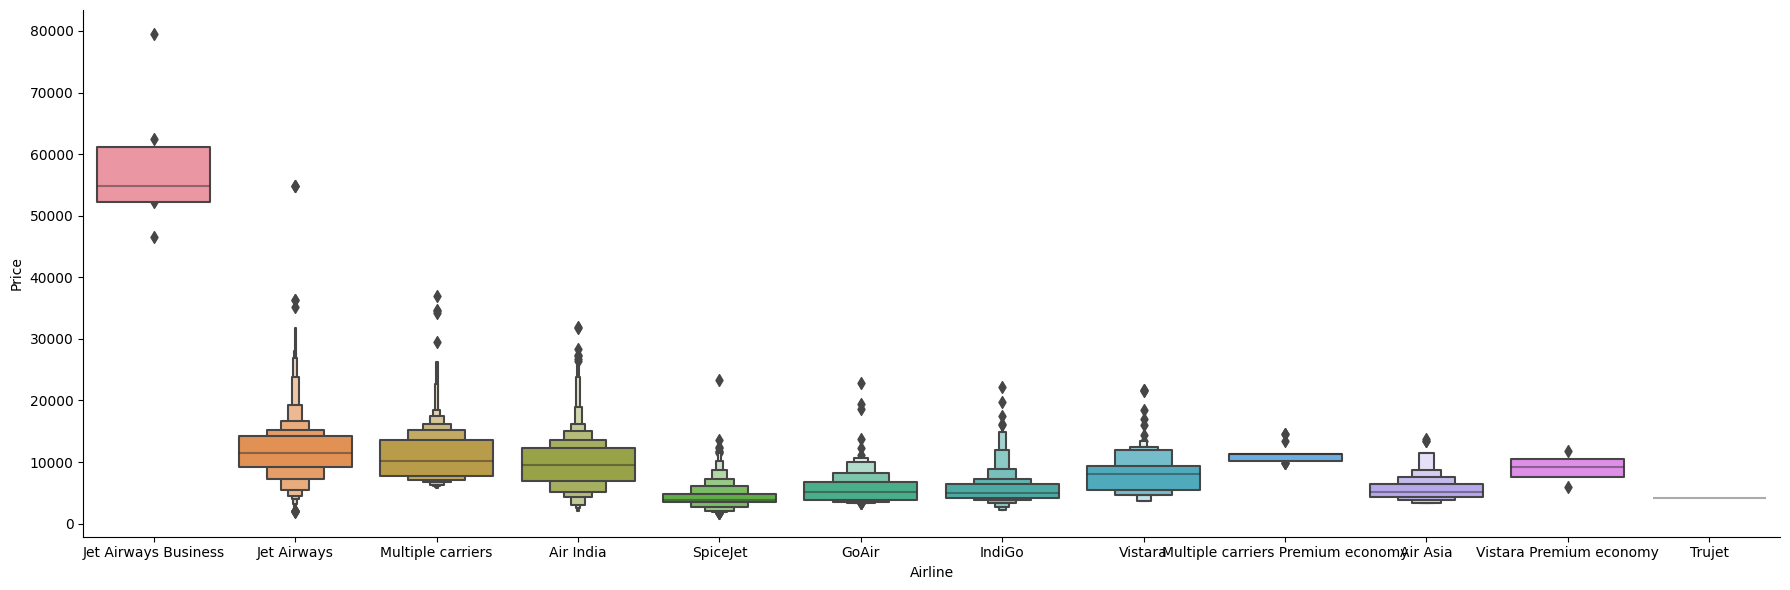

In [22]:
# From this graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = df1.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [23]:
#Insights
#"Jet Airways Business" tickets are the most expensive ones.

**Price on Weekdays vs Weekends**

In [25]:
days_df = df1[['Airline','Date_of_Journey', 'Price']].copy()
days_df.tail()

,Airline,Date_of_Journey,Price
10678,Air Asia,9/04/2019,4107
10679,Air India,27/04/2019,4145
10680,Jet Airways,27/04/2019,7229
10681,Vistara,01/03/2019,12648
10682,Air India,9/05/2019,11753


In [28]:
days_df['Date_of_Journey'] = pd.to_datetime(days_df['Date_of_Journey'],format='%d/%m/%Y')
days_df['Weekday'] = days_df['Date_of_Journey'].dt.day_name()
days_df['Weekend'] = days_df['Weekday'].apply(lambda day: 1 if day == 'Sunday' or day == 'Saturday'  else 0)
days_df.tail()

,Airline,Date_of_Journey,Price,Weekday,Weekend
10678,Air Asia,2019-04-09,4107,Tuesday,0
10679,Air India,2019-04-27,4145,Saturday,1
10680,Jet Airways,2019-04-27,7229,Saturday,1
10681,Vistara,2019-03-01,12648,Friday,0
10682,Air India,2019-05-09,11753,Thursday,0


In [35]:
days_df['Weekend'].value_counts()

0    7538
1    3144
Name: Weekend, dtype: int64

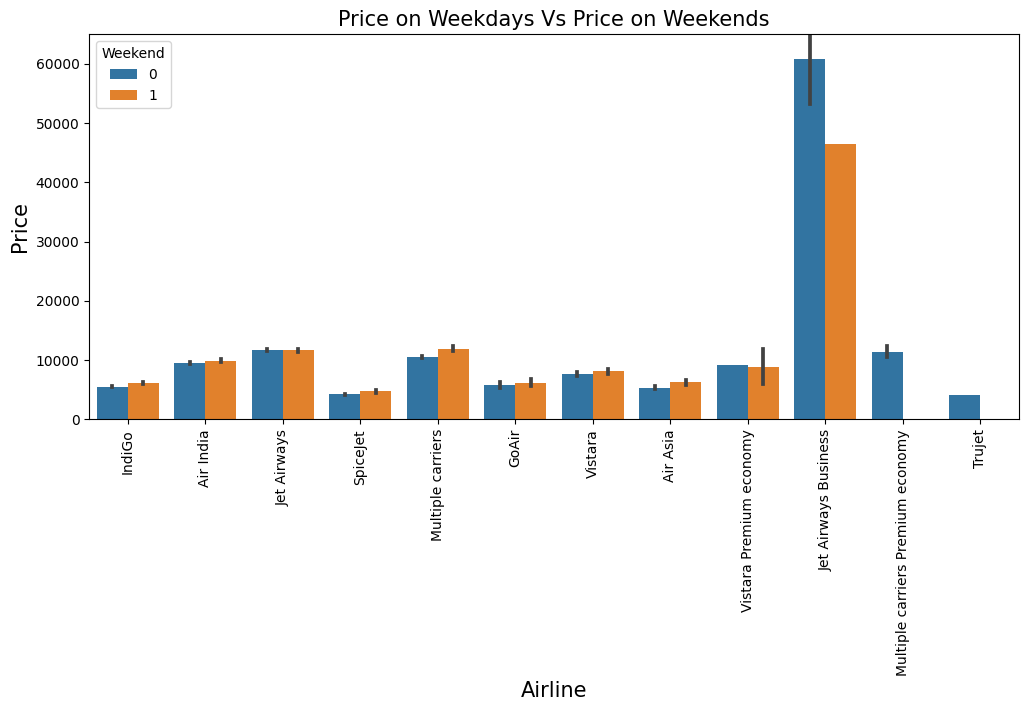

In [29]:
plt.subplots(figsize=(12,5))
sns.barplot(data=days_df,x='Airline',y='Price',hue='Weekend')
plt.xlabel("Airline",size = 15)
plt.xticks(rotation = 90)
plt.ylabel("Price",size = 15)
plt.title("Price on Weekdays Vs Price on Weekends",size = 15)
plt.legend(title='Weekend'.title())
plt.ylim(0,65000)
plt.show()

# #Except jet airways business all other airlines have higher prices on weekends

In [33]:
#Adding the weekend column in our dataframe
df1=pd.concat([df1,days_df['Weekend']],axis=1)

In [34]:
df1.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Weekend
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,0
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,1
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,1
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,0
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753,0


In [ ]:
#Source vs prices

In [36]:
df1["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

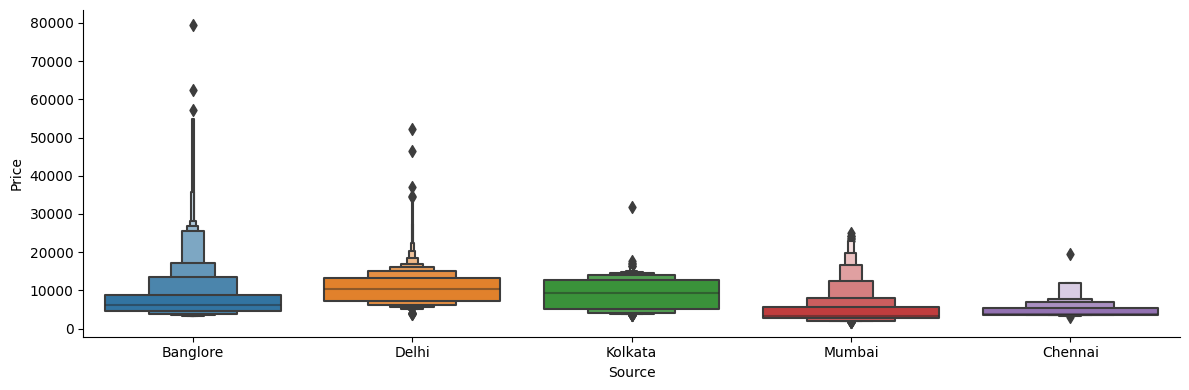

In [37]:
sns.catplot(y = "Price", x = "Source", data = df1.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [38]:
df1["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

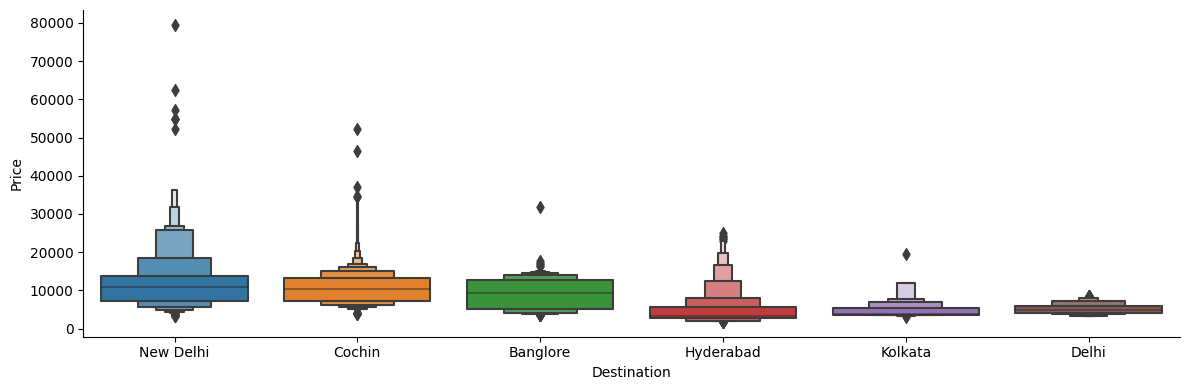

In [39]:
sns.catplot(y = "Price", x = "Destination", data = df1.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [40]:
df1["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

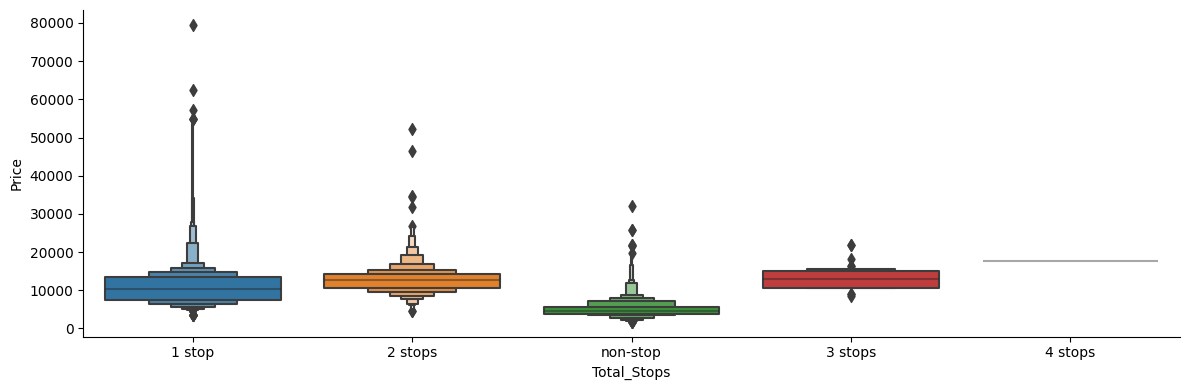

In [41]:
sns.catplot(y = "Price", x = "Total_Stops", data = df1.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [ ]:
#Feature Engineering

In [43]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Weekend
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,1
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,1
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,1
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,0


In [42]:
df1["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [44]:
df1["Route"].head()

0                BLR → DEL
1    CCU → IXR → BBI → BLR
2    DEL → LKO → BOM → COK
3          CCU → NAG → BLR
4          BLR → NAG → DEL
Name: Route, dtype: object

In [45]:
# Additional_Info contains almost 80% no_info
# Total_Stops columns takes into account Route column and explains it
# Therefore we drop both Additional_Info & Route

df1.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [46]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Weekend
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,1
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,0
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,1
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,1
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,0


In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Duration         10682 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Price            10682 non-null  int64 
 9   Weekend          10682 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 918.0+ KB


In [ ]:
#Date_of_Journey is in object type we need to extract Date and Month of Journey
"""Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction
For this we require pandas to_datetime to convert object data type to datetime dtype.

.dt.day method will extract only day of that date
.dt.month method will extract only month of that date """

In [48]:
df1["Journey_day"] = pd.to_datetime(df1.Date_of_Journey, format="%d/%m/%Y").dt.day

In [49]:
df1["Journey_month"] = pd.to_datetime(df1["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [51]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

df1.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [52]:
df1.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Weekend,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,1,24,3
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,0,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,1,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,1,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,0,1,3


In [53]:
# Departure time is when a plane leaves the gate.
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
df1["Dep_hour"] = pd.to_datetime(df1["Dep_Time"]).dt.hour

# Extracting Minutes
df1["Dep_min"] = pd.to_datetime(df1["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
df1.drop(["Dep_Time"], axis = 1, inplace = True)

In [54]:
df1.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Price,Weekend,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,3897,1,24,3,22,20
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,7662,0,1,5,5,50
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2 stops,13882,1,9,6,9,25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,6218,1,12,5,18,5
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,13302,0,1,3,16,50


In [55]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
df1["Arrival_hour"] = pd.to_datetime(df1.Arrival_Time).dt.hour

# Extracting Minutes
df1["Arrival_min"] = pd.to_datetime(df1.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
df1.drop(["Arrival_Time"], axis = 1, inplace = True)

In [56]:
df1.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Weekend,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,1,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,0,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,1,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,1,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,0,1,3,16,50,21,35


In [59]:
#Duration column
"""Extract hours and min from Duration feature.
Convert hours to min and find total duration in minutes to make it a single column"""

'Extract hours and min from Duration feature.\nConvert hours to min and find total duration in minutes to make it a single column'

In [60]:
df1["Duration_hr"]=df1["Duration"].str.split(' ').str[0].str.split('h').str[0]

In [61]:
df1["Duration_min"]=df1["Duration"].str.split(' ').str[1].str.split('m').str[0]

In [62]:
df1['Duration_min'].fillna("0",inplace=True)

In [64]:
df1['Duration_hr'].str.contains('h').sum()

0

In [65]:
df1['Duration_hr'].str.contains('m').sum()

1

In [66]:
df1[df1['Duration_hr'].str.contains('m')]

,Airline,Source,Destination,Duration,Total_Stops,Price,Weekend,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hr,Duration_min
6474,Air India,Mumbai,Hyderabad,5m,2 stops,17327,0,6,3,16,50,16,55,5m,0


In [67]:
df1.loc[[6474], 'Duration_min'] = df1.loc[[6474], 'Duration_hr']
df1.loc[df1['Duration_min'] == '5m', 'Duration_min'] = 5

In [68]:
df1["Duration_hr"]=df1["Duration_hr"].replace("5m","0")

In [69]:
df1[df1['Duration_hr'].str.contains('m')]

,Airline,Source,Destination,Duration,Total_Stops,Price,Weekend,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hr,Duration_min


In [71]:
df1['Duration_min'].str.contains('h').sum()

0

In [72]:
df1['Duration_min'].str.contains('m').sum()

0

In [76]:
df1["Duration_hr"] = df1["Duration_hr"].astype(int)

In [75]:
df1["Duration_min"] = df1["Duration_min"].astype(int)

In [78]:
df1["Duration"] = (df1["Duration_hr"]*60) + df1["Duration_min"]
df1=df1.drop(['Duration_hr','Duration_min'],axis=1)
df1.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Weekend,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,170,non-stop,3897,1,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,445,2 stops,7662,0,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,1140,2 stops,13882,1,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,325,1 stop,6218,1,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,285,1 stop,13302,0,1,3,16,50,21,35


In [79]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Airline        10682 non-null  object
 1   Source         10682 non-null  object
 2   Destination    10682 non-null  object
 3   Duration       10682 non-null  int64 
 4   Total_Stops    10682 non-null  object
 5   Price          10682 non-null  int64 
 6   Weekend        10682 non-null  int64 
 7   Journey_day    10682 non-null  int64 
 8   Journey_month  10682 non-null  int64 
 9   Dep_hour       10682 non-null  int64 
 10  Dep_min        10682 non-null  int64 
 11  Arrival_hour   10682 non-null  int64 
 12  Arrival_min    10682 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.4+ MB


**Handling Categorical Variables**


Nominal data --> data are not in any order --> OneHotEncoder is used in this case

Ordinal data --> data are in order --> LabelEncoder is used in this case

In [80]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = df1[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [81]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = df1[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [82]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = df1[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [83]:
# Concatenate dataframe --> df1 + Airline + Source + Destination

df2 = pd.concat([df1, Airline, Source, Destination], axis = 1)

In [84]:
df2.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Weekend,Journey_day,Journey_month,Dep_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,170,non-stop,3897,1,24,3,22,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,445,2 stops,7662,0,1,5,5,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1140,2 stops,13882,1,9,6,9,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,325,1 stop,6218,1,12,5,18,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,285,1 stop,13302,0,1,3,16,...,0,0,0,0,0,0,0,0,0,1


In [85]:
df2.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [86]:
df2.head()

,Duration,Total_Stops,Price,Weekend,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,non-stop,3897,1,24,3,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,445,2 stops,7662,0,1,5,5,50,13,15,...,0,0,0,1,0,0,0,0,0,0
2,1140,2 stops,13882,1,9,6,9,25,4,25,...,0,0,1,0,0,1,0,0,0,0
3,325,1 stop,6218,1,12,5,18,5,23,30,...,0,0,0,1,0,0,0,0,0,0
4,285,1 stop,13302,0,1,3,16,50,21,35,...,0,0,0,0,0,0,0,0,0,1


In [87]:
df2["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [88]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

df2.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


In [89]:
df2["Total_Stops"].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [90]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Duration                                   10682 non-null  int64
 1   Total_Stops                                10682 non-null  int64
 2   Price                                      10682 non-null  int64
 3   Weekend                                    10682 non-null  int64
 4   Journey_day                                10682 non-null  int64
 5   Journey_month                              10682 non-null  int64
 6   Dep_hour                                   10682 non-null  int64
 7   Dep_min                                    10682 non-null  int64
 8   Arrival_hour                               10682 non-null  int64
 9   Arrival_min                                10682 non-null  int64
 10  Airline_Air India                          106

In [91]:
df2.isna().sum().sum()

0

In [92]:
df2.head(3)

,Duration,Total_Stops,Price,Weekend,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,0,3897,1,24,3,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,445,2,7662,0,1,5,5,50,13,15,...,0,0,0,1,0,0,0,0,0,0
2,1140,2,13882,1,9,6,9,25,4,25,...,0,0,1,0,0,1,0,0,0,0


In [95]:
df1.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [ ]:
#Feature Selection
"""Finding out the best feature which will contribute and have good relation with the target variable(Price).
Let's use heat map to find correlation between features."""

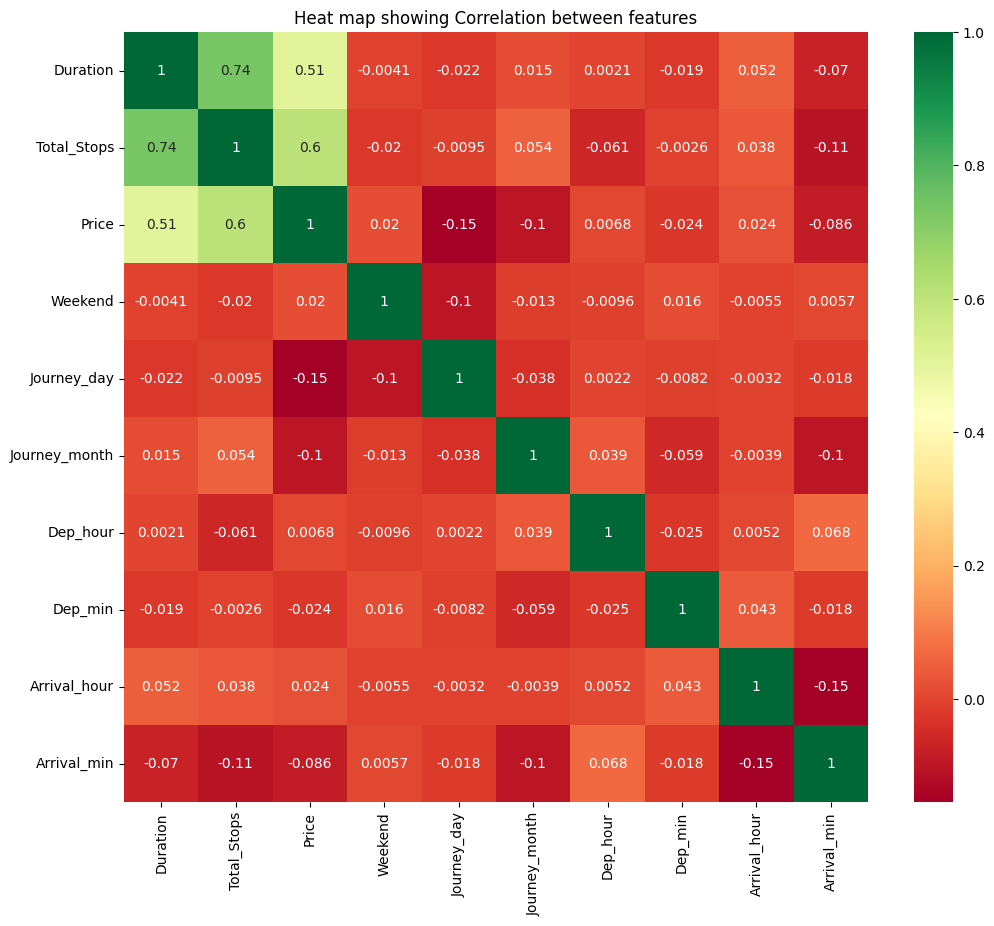

In [97]:
plt.figure(figsize=(12,10))

sns.heatmap(df1.corr(),annot=True,cmap='RdYlGn')
plt.title("Heat map showing Correlation between features")

plt.show()

In [ ]:
#There is a high correlation between:

'''Price & Total Stops

Price & flight duration

Duration & Total stops'''

Building Machine Learning Models